<a href="https://colab.research.google.com/github/Asigen93/JST2_Tugas2/blob/main/TUGAS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import pustaka yang diperlukan
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns  # Untuk visualisasi statistik
import tensorflow as tf  # Untuk deep learning
from tensorflow.keras import datasets, layers, models  # Komponen dasar untuk membangun model neural
from tensorflow.keras.utils import to_categorical  # Untuk mengubah label menjadi format one-hot encoding
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Untuk evaluasi model

# Set seed untuk reproduksibilitas
np.random.seed(42)
tf.random.set_seed(42)

# Load dan preprocess dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi data gambar
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Konversi label menjadi format one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [26]:
# Define a function to create and compile a CNN model
def create_model(activation_function):
  model = models.Sequential ([

    layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=activation_function),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=activation_function),
    layers.Flatten(),
    layers.Dense (64, activation=activation_function),
    layers.Dense(10, activation='softmax') # Softmax for output layer
])

  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  return model

# List of activation functions to compare
activation_functions = ['linear', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}

In [29]:
# Latih dan evaluasi model dengan berbagai fungsi aktivasi
for activation in activation_functions:
    print(f"Training model with activation: {activation}...")
    if activation == 'leaky_relu':
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Flatten(),
            layers.Dense(64),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    else:
        model = create_model(activation)

    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2, verbose=2)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

Training model with activation: linear...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 - 53s - 85ms/step - accuracy: 0.4735 - loss: 1.5020 - val_accuracy: 0.5545 - val_loss: 1.2820
Epoch 2/10
625/625 - 81s - 130ms/step - accuracy: 0.5772 - loss: 1.2207 - val_accuracy: 0.6013 - val_loss: 1.1857
Epoch 3/10
625/625 - 80s - 128ms/step - accuracy: 0.6108 - loss: 1.1305 - val_accuracy: 0.6129 - val_loss: 1.1520
Epoch 4/10
625/625 - 84s - 134ms/step - accuracy: 0.6345 - loss: 1.0696 - val_accuracy: 0.6233 - val_loss: 1.1248
Epoch 5/10
625/625 - 50s - 80ms/step - accuracy: 0.6503 - loss: 1.0225 - val_accuracy: 0.6260 - val_loss: 1.1152
Epoch 6/10
625/625 - 84s - 134ms/step - accuracy: 0.6648 - loss: 0.9812 - val_accuracy: 0.6275 - val_loss: 1.1091
Epoch 7/10
625/625 - 82s - 130ms/step - accuracy: 0.6775 - loss: 0.9446 - val_accuracy: 0.6283 - val_loss: 1.1099
Epoch 8/10
625/625 - 82s - 132ms/step - accuracy: 0.6893 - loss: 0.9128 - val_accuracy: 0.6294 - val_loss: 1.1139
Epoch 9/10
625/625 - 80s - 128ms/step - accuracy: 0.7009 - loss: 0.8825 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
625/625 - 56s - 89ms/step - accuracy: 0.4444 - loss: 1.5337 - val_accuracy: 0.5519 - val_loss: 1.2589
Epoch 2/10
625/625 - 54s - 86ms/step - accuracy: 0.5910 - loss: 1.1599 - val_accuracy: 0.6218 - val_loss: 1.0697
Epoch 3/10
625/625 - 54s - 86ms/step - accuracy: 0.6485 - loss: 0.9970 - val_accuracy: 0.6600 - val_loss: 0.9704
Epoch 4/10
625/625 - 82s - 131ms/step - accuracy: 0.6890 - loss: 0.8890 - val_accuracy: 0.6838 - val_loss: 0.9220
Epoch 5/10
625/625 - 81s - 130ms/step - accuracy: 0.7178 - loss: 0.8061 - val_accuracy: 0.6810 - val_loss: 0.9326
Epoch 6/10
625/625 - 85s - 136ms/step - accuracy: 0.7465 - loss: 0.7324 - val_accuracy: 0.6860 - val_loss: 0.9336
Epoch 7/10
625/625 - 78s - 125ms/step - accuracy: 0.7655 - loss: 0.6761 - val_accuracy: 0.6829 - val_loss: 0.9526
Epoch 8/10
625/625 - 54s - 86ms/step - accuracy: 0.7819 - loss: 0.6274 - val_accuracy: 0.6882 - val_loss: 0.9564
Epoch 9/10
625/625 - 80s - 128ms/step - accuracy: 0.8001 - loss: 0.5753 - val_accuracy: 0.69

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


Text(0.5, 1.0, 'Training Accuracy for Different Activation Functions on CIFAR-10')

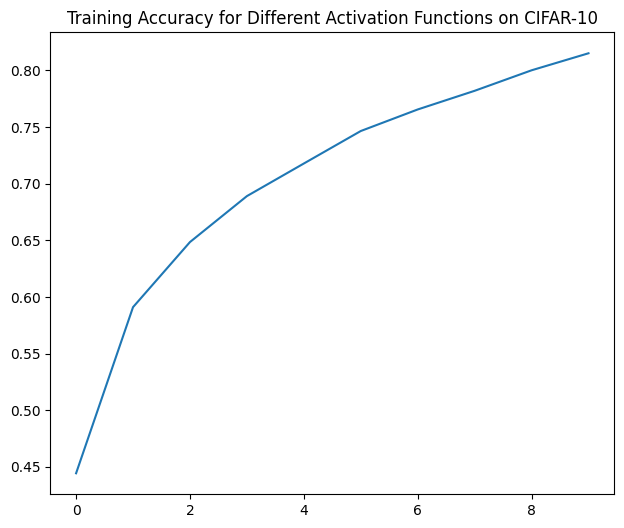

In [30]:
# Simpan history, loss, akurasi, dan confusion matrix
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
results[activation] = (history, test_loss, test_acc, conf_matrix)

# Plot hasil akurasi dan loss
plt.figure(figsize=(16, 6))

# Plot akurasi pelatihan
plt.subplot(1, 2, 1)
for activation, (history, _, _, _) in results.items():
    plt.plot(history.history['accuracy'], label=f'{activation} (train)')
plt.title('Training Accuracy for Different Activation Functions on CIFAR-10')

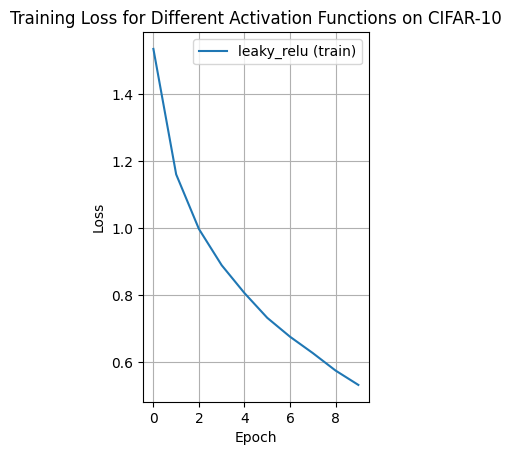

In [31]:
# Plot training loss

plt.subplot(1, 2, 2)

for activation, (history, _, _, _) in results.items():
    plt.plot(history.history['loss'], label=f'{activation} (train)')
plt.title('Training Loss for Different Activation Functions on CIFAR-10')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()


Test accuracy with leaky_relu: 0.6957


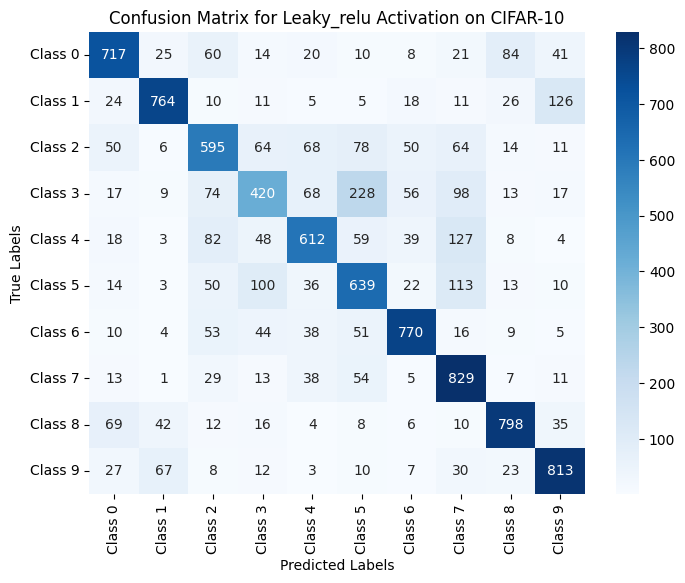

In [32]:
# Display confusion matrix for each activation function

for activation, (_, _, test_acc, conf_matrix) in results.items():
    print(f'\nTest accuracy with {activation}: {test_acc:.4f}')

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i}' for i in range(10)],
                yticklabels=[f'Class {i}' for i in range(10)])
    plt.title(f'Confusion Matrix for {activation.capitalize()} Activation on CIFAR-10')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()